# Intervalos de confiança e classificação

Vamos aplicar os intervalos de confiança aplicados a um modelo de Machine Learning de classificação. 

Pode-se utilizar os intervalos de confiança para melhorar a avaliação do algoritmo. É muito importante para artigos científicos.

In [40]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, KFold
import seaborn as sns
from scipy import stats

In [18]:
dataset = pd.read_csv('credit_data.csv')

In [19]:
dataset.dropna(inplace=True)

In [20]:
dataset.head()

,i#clientid,income,age,loan,c#default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1


Vamos avaliar os modelos para previsão de pessoas que vão pagar o empréstimo ou não.

In [21]:
X = dataset.iloc[:, 1:4].values

In [22]:
y = dataset.iloc[:, 4].values

In [23]:
resultados_naive_bayes_cv = []
resultados_naive_bayes_cv_300 = []
resultados_logistica_cv = []
resultados_logistica_cv_300 = []
resultados_forest_cv = []
resultados_forest_cv_300 = []

In [24]:
for i in range(30):
    kfold = KFold(n_splits = 10, shuffle = True, random_state = i)
    
    naive_bayes = GaussianNB()
    scores = cross_val_score(naive_bayes, X, y, cv=kfold)
    resultados_naive_bayes_cv_300.append(scores)
    resultados_naive_bayes_cv.append(scores.mean())
    
    logistica = LogisticRegression()
    scores = cross_val_score(logistica, X, y, cv=kfold)
    resultados_logistica_cv_300.append(scores)
    resultados_logistica_cv.append(scores.mean())
    
    random_forest = RandomForestClassifier()
    scores = cross_val_score(random_forest, X, y, cv=kfold)
    resultados_forest_cv_300.append(scores)
    resultados_forest_cv.append(scores.mean())

In [25]:
len(resultados_naive_bayes_cv), len(resultados_naive_bayes_cv_300)

(30, 30)

In [26]:
print(resultados_naive_bayes_cv) # Está no formato de matriz

[0.9248618090452261, 0.9249170854271356, 0.9248894472361808, 0.9228819095477387, 0.9248718592964824, 0.9253894472361809, 0.9243844221105528, 0.9248894472361808, 0.9248718592964824, 0.9238894472361808, 0.9253844221105527, 0.9244020100502512, 0.9253743718592965, 0.924394472361809, 0.9253869346733667, 0.9248819095477387, 0.9258844221105527, 0.924894472361809, 0.9238819095477387, 0.9258844221105529, 0.9258944723618091, 0.9253894472361811, 0.92436432160804, 0.9263844221105527, 0.9228944723618092, 0.9253894472361809, 0.9248869346733668, 0.9253919597989949, 0.9253819095477386, 0.9258844221105527]


In [28]:
resultados_naive_bayes_cv = np.array(resultados_naive_bayes_cv)
resultados_naive_bayes_cv_300 = np.array(np.asarray(resultados_naive_bayes_cv_300).reshape(-1))
resultados_logistica_cv = np.array(resultados_logistica_cv)
resultados_logistica_cv_300 = np.array(np.asarray(resultados_logistica_cv_300).reshape(-1))
resultados_forest_cv = np.array(resultados_forest_cv)
resultados_forest_cv_300 = np.array(np.asarray(resultados_forest_cv_300).reshape(-1))

In [29]:
resultados_naive_bayes_cv_300.shape

(300,)

C:\Users\Francisco\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

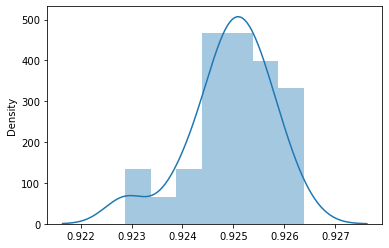

In [32]:
sns.distplot(resultados_naive_bayes_cv)

C:\Users\Francisco\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

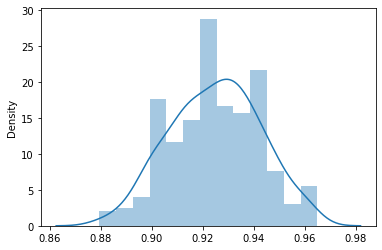

In [33]:
sns.distplot(resultados_naive_bayes_cv_300)

C:\Users\Francisco\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

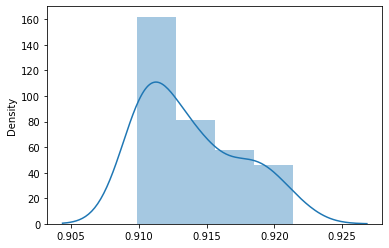

In [34]:
sns.distplot(resultados_logistica_cv)

C:\Users\Francisco\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

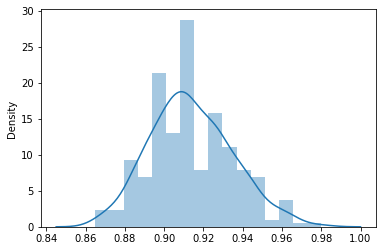

In [35]:
sns.distplot(resultados_logistica_cv_300)

Têm-se uma discussão muito importante sobre a aplicação desses intervalos de confiança para estrutura de dados que não seguem a distribuições normais. Porém, os pesquisadores comprovaram que de certa forma consegue um resultado interessante. É a teoria central do limite, que diz: "quanto mais experimentos realizados, tem a chance de chegar uma distribuição normal."

C:\Users\Francisco\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

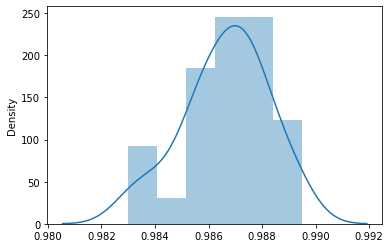

In [36]:
sns.distplot(resultados_forest_cv)

C:\Users\Francisco\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

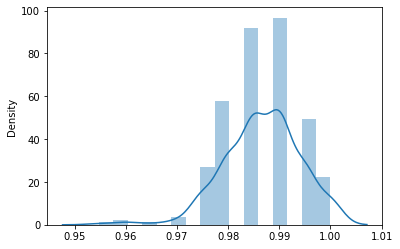

In [37]:
sns.distplot(resultados_forest_cv_300)

In [38]:
resultados_naive_bayes_cv.mean(), resultados_logistica_cv.mean(), resultados_forest_cv.mean()

(0.9249359296482411, 0.9137817420435511, 0.9866304020100501)

In [42]:
# Coeficiente de variacao dos dados em %
stats.variation(resultados_naive_bayes_cv)*100, stats.variation(resultados_logistica_cv)*100, stats.variation(resultados_forest_cv)*100

(0.08641071566366061, 0.38801026116292653, 0.1594342362913955)

# Cálculos de intervalo de confiança

In [43]:
from scipy.stats import t
from scipy.stats import norm

### Naive Bayes

Utilizando a distribuição t-student

In [44]:
intervalo_naive_bayes_t = t.interval(0.95, len(resultados_naive_bayes_cv)-1, resultados_naive_bayes_cv.mean(), stats.sem(resultados_naive_bayes_cv, ddof=0))

In [45]:
intervalo_naive_bayes_t

(0.9246374871248957, 0.9252343721715865)

In [46]:
abs(resultados_naive_bayes_cv.mean() - intervalo_naive_bayes_t[0]) # Cálculo da margem de erro

0.0002984425233454324

Utilizando a distribuição normal

In [47]:
intervalo_naive_bayes_norm = norm.interval(0.95, resultados_naive_bayes_cv_300.mean(), stats.sem(resultados_naive_bayes_cv_300))

In [48]:
intervalo_naive_bayes_norm

(0.9229333893644709, 0.9269384699320113)

In [49]:
abs(resultados_naive_bayes_cv_300.mean() - intervalo_naive_bayes_norm[0]) # Cálculo da margem de erro

0.0020025402837702266

Percebe-se que a margem é maior. Confirmando que, quanto mais dados melhor é a representação dos dados.

### Regressão Logistica

T-student

In [50]:
intervalo_Logistica = t.interval(0.95, len(resultados_logistica_cv)-1, resultados_logistica_cv.mean(), stats.sem(resultados_logistica_cv, ddof=0))
intervalo_Logistica
abs(resultados_logistica_cv.mean() - intervalo_Logistica[0]) # Cálculo da margem de erro

0.0013239364476194115

Normal

In [51]:
intervalo_logistica_norm = norm.interval(0.95, resultados_logistica_cv_300.mean(), stats.sem(resultados_logistica_cv_300))
intervalo_logistica_norm
abs(resultados_logistica_cv_300.mean() - intervalo_logistica_norm[0]) # Cálculo da margem de erro

0.0023624760415116297

### Random Forest

T-student

In [52]:
intervalo_forest = t.interval(0.95, len(resultados_forest_cv)-1, resultados_forest_cv.mean(), stats.sem(resultados_forest_cv, ddof=0))
intervalo_forest
abs(resultados_forest_cv.mean() - intervalo_forest[0]) # Cálculo da margem de erro

0.0005873778030734966

Normal

In [53]:
intervalo_forest_norm = norm.interval(0.95, resultados_forest_cv_300.mean(), stats.sem(resultados_forest_cv_300))
intervalo_forest_norm
abs(resultados_forest_cv_300.mean() - intervalo_logistica_norm[0]) # Cálculo da margem de erro

0.07521113600801066

Até o momento o menor resultado para os intervalos é o modelo Naive Bayes para o teste T-student.

Logo, quando a variância dos testes de intervalo de confiança é menor possível de acordo com avaliação do Kfold e cross validation, percebe-se que quando rodar novamente os novos valores estarão presente na faixa de confiabilidade determinada a partir do intervalo. Garantindo que, os modelos que variam menos, determinam que novos resultados estarão dentro da faixa de confiabilidade de 95% estipulada.